**MOVIE RATING PREDICTION**

Objective of the project:

The goal is to develop a machine learning model that predicts movie ratings based on attributes such as genre, director, and cast. By analyzing historical data, the project aims to uncover key factors influencing ratings, apply feature engineering and regression techniques, and provide actionable insights for stakeholders to optimize content and marketing strategies.

In [31]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

In [32]:
# Loading the Movies dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


**Exploratory Data Analysis**

In [33]:
# Shape of Dataset
df.shape

(15509, 10)

There are 10 columns and 15509 rows of data present in the movies dataset.

In [34]:
# Columns in data
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [35]:
# Unique Values in each Column
df.nunique()

,0
Name,13838
Year,102
Duration,182
Genre,485
Rating,84
Votes,2034
Director,5938
Actor 1,4718
Actor 2,4891
Actor 3,4820


In [36]:
df.info()  # Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


**Null Value Check**

In [37]:
(df.isna().sum()/ len(df)) * 100

,0
Name,0.000000
Year,3.404475
Duration,53.317429
Genre,12.102650
Rating,48.939326
Votes,48.932878
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


In [38]:
# Fixing Null Values
df = df.dropna()
df.isna().sum() # Comfirming Null values fixation

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


**Checking for Duplicates**

In [39]:
df.duplicated().sum()

0

**Feature Engineeering**

In [40]:
# Formatting 'Year' and 'Duration' for Better Analysis
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = df['Duration'].str.replace(' min', "", regex = True).astype(int)

# Converting the datatype of Votes column to int
df['Votes'] = df['Votes'].str.replace(',', '', regex=True).astype(int)

**Unnesting the Genre Column**

In [41]:
#Cleaning the Genre column
df['Genre'] = df['Genre'].str.strip().str.lower().str.split(', ')
# Unnest the Genre column
df = df.explode('Genre')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [42]:
#Resetting the index
df.reset_index(drop=True, inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,#Yaaram,2019,110,romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...Aur Pyaar Ho Gaya,1997,147,comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
4,...Aur Pyaar Ho Gaya,1997,147,drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [43]:
#Checking datatypes of each column
df.dtypes

,0
Name,object
Year,int64
Duration,int64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [44]:
# Basic Statistics for Numerical Columns
df.describe()

,Year,Duration,Rating,Votes
count,11979.000000,11979.000000,11979.000000,11979.000000
mean,1996.099174,135.871024,5.879356,3335.405293
std,19.314008,25.012586,1.374243,15305.935731
min,1931.000000,21.000000,1.100000,5.000000
25%,1982.000000,120.000000,5.000000,41.000000
50%,2001.000000,137.000000,6.100000,213.000000
75%,2012.000000,152.000000,6.900000,1469.000000
max,2021.000000,321.000000,10.000000,591417.000000


There may be outliers present in each of these columns

**Outlier check**

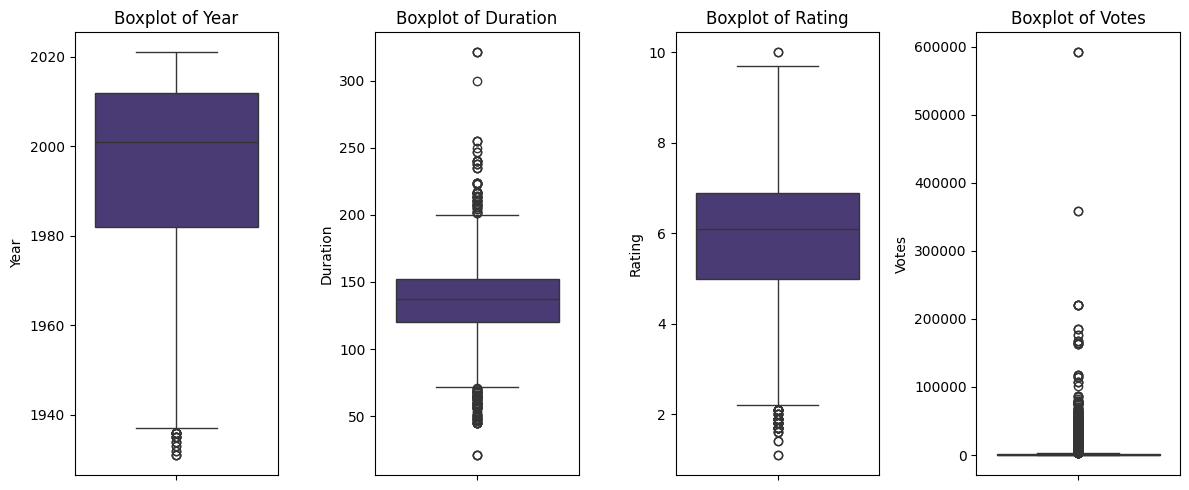

In [45]:
plt.figure(figsize=(12,5))

# Boxplot for Year
plt.subplot(1,4, 1)
sns.boxplot(y=df['Year'])
plt.title('Boxplot of Year')

# Boxplot for Duration
plt.subplot(1,4, 2)
sns.boxplot(y=df['Duration'])
plt.title('Boxplot of Duration')

# Boxplot for Rating
plt.subplot(1,4, 3)
sns.boxplot(y=df['Rating'])
plt.title('Boxplot of Rating')

# Boxplot for Votes
plt.subplot(1,4, 4)
sns.boxplot(y=df['Votes'])
plt.title('Boxplot of Votes')

# Adjust layout
plt.tight_layout()
plt.show()

From the plots, we can see that outliers are present.

**Removing Outliers using IQR Method**

In [46]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers for each column
df['Year'] = remove_outliers_iqr(df['Year'])
df['Duration'] = remove_outliers_iqr(df['Duration'])
df['Rating'] = remove_outliers_iqr(df['Rating'])
df['Votes'] = remove_outliers_iqr(df['Votes'])

# Drop rows with NaN values that resulted from outlier removal
df = df.dropna()

**Data Visualizations**

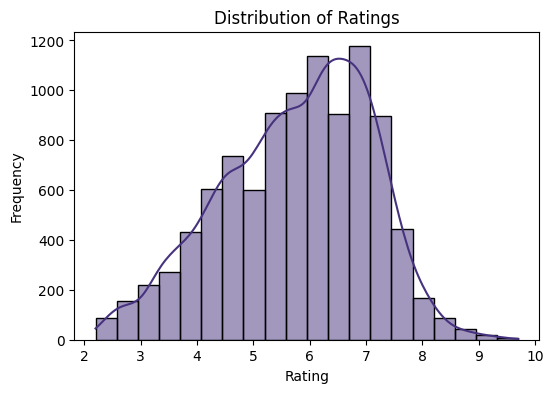

In [47]:
#Ratings Distribution
plt.figure(figsize = (6,4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

Insight: The highest frequency of ratings lies between 6 and 7, indicating this range is the most common rating for movies.


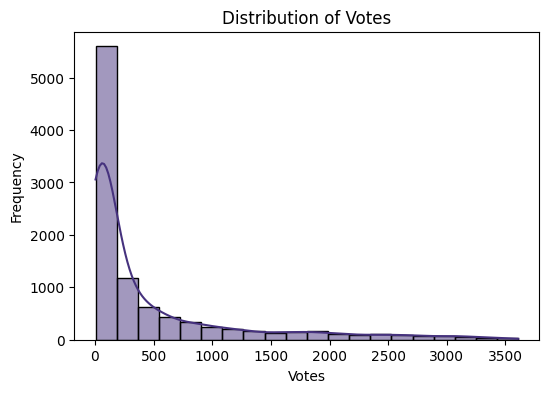

In [48]:
#Votings Distribution
plt.figure(figsize = (6,4))
sns.histplot(df['Votes'], bins=20, kde=True)
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Votes')
plt.show()

Insight: The distribution is heavily skewed to the right, meaning the majority of movies receive a relatively low number of votes.
A significant number of movies received fewer than 500 votes.

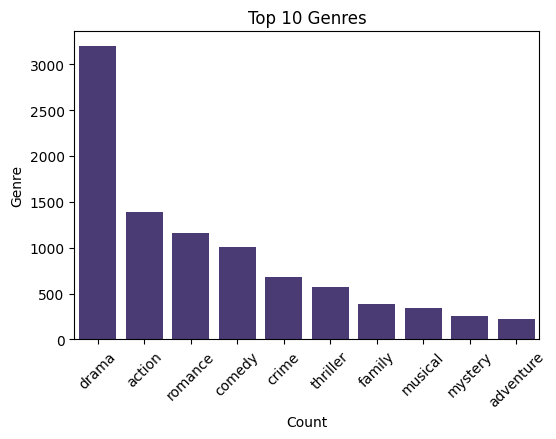

In [49]:
#Top 10 Genres
genre_counts = df['Genre'].value_counts().head(10)

plt.figure(figsize = (6,4))
sns.set_palette('viridis')
sns.barplot(x=genre_counts.index, y= genre_counts.values)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.title('Top 10 Genres')
plt.show()

Insight:
Top 3 Genres are : Drama, Action and Romance.

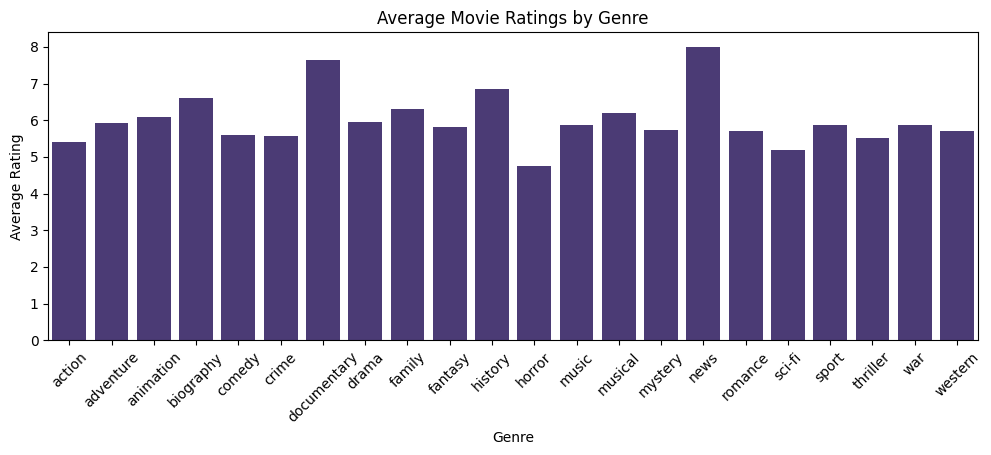

In [50]:
#Genres with Highest Rating.
average_rating_by_genre = df.groupby('Genre')['Rating'].mean().reset_index()

plt.figure(figsize = (12,4))
sns.barplot(x='Genre', y='Rating', data=average_rating_by_genre)
plt.title('Average Movie Ratings by Genre')
plt.xlabel('Genre')
plt.xticks(rotation = 45)
plt.ylabel('Average Rating')
plt.show()

Insight : The genres 'Documentary' and 'News' have the highest average rating.

In [51]:
# Year with the Highest Average Rating
average_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

fig = px.line(
    average_rating_by_year,
    x='Year',
    y='Rating',
    markers=True,
    title='Average Movie Ratings by Year'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Rating',
    hovermode='x unified'  # Ensures the hover shows information for the x-axis value
)
fig.show()

Insight: The year of 1952 had the highest rating.

In [52]:
# Count the number of movies released each year
movies_per_year = df['Year'].value_counts().sort_index().reset_index()
movies_per_year.columns = ['Year', 'Number of Movies']  # Rename columns

fig = px.line(
    movies_per_year,
    x='Year',
    y='Number of Movies',
    markers=True,
    title='Number of Movies Released Over the Years'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Movies',
    hovermode='x unified'  # Ensures the hover shows information for the x-axis value
)
fig.show()

Insight : The number of movies released has generally increased over the years, with some fluctuations. However, there is a sharp decline in the number of movies released in 2020 and 2021.

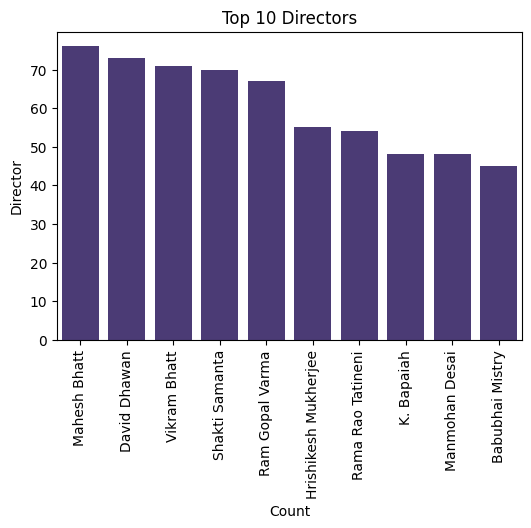

In [53]:
#Top 10 Directors
Director_counts = df['Director'].value_counts().head(10)

plt.figure(figsize = (6,4))
sns.barplot(x=Director_counts.index, y= Director_counts.values)
plt.xlabel('Count')
plt.ylabel('Director')
plt.xticks(rotation=90)
plt.title('Top 10 Directors')
plt.show()

**MODEL BUILDING**

In [54]:
# Importing libraries for Model Development
!pip install --upgrade scikit-learn category_encoders
!pip install scikit-learn==1.1.3
!pip install category_encoders
from category_encoders import JamesSteinEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
  Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but 

In [55]:
#Scaling the data
scaler = StandardScaler()
df[['Year','Duration', 'Rating', 'Votes']] = scaler.fit_transform(df[['Year','Duration', 'Rating', 'Votes']])

In [56]:
# Dropping irrelevant column and splitting target column
df.drop(columns = 'Name', inplace = True)
X = df.drop(columns = 'Rating')
y = df['Rating']

In [57]:
#Data Encoding
encoder = JamesSteinEncoder()
encoder.fit(X,y)
X = encoder.transform(X.loc[:,:])

In [58]:
X.head()

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,1.316215,-1.117068,0.075608,-0.630631,0.937147,0.802959,0.937147,0.937147
1,1.316215,-1.073901,-0.068940,-0.594193,-1.030510,-0.437903,-1.030510,-0.983415
2,1.316215,-1.073901,-0.021423,-0.594193,-1.030510,-0.437903,-1.030510,-0.983415
3,0.181039,0.523286,-0.068940,0.474653,-0.223931,-0.603982,-0.665180,-0.068345
4,0.181039,0.523286,0.075608,0.474653,-0.223931,-0.603982,-0.665180,-0.068345


In [59]:
#Splitting the data into train , validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

**Random Forest Model**

In [78]:
# Building Predictive Model
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

In [79]:
#Model Evaluation
rf_mse = mean_squared_error(y_val, rf_pred)
rf_r2 = r2_score(y_val, rf_pred)
print("Mean Squared Error:", rf_mse)
print(f"R-squared: {rf_r2:.2f}")

Mean Squared Error: 0.06412724958097742
R-squared: 0.93


Insight:

Model Performance: The model is performing well, as indicated by both the low MSE and the high R². The predictions are close to the actual values, and the model explains a significant portion of the variance in the data.

In [85]:
#Test data prediction
test_pred = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
print("Mean Squared Error:", test_mse)
print(f"R-squared: {test_r2:.2f}")

Mean Squared Error: 0.06114876924091567
R-squared: 0.94


The model performs well on the test data as well.

**Conclusion:**

This project explored the development of a predictive model for movie ratings using data-driven methodologies. By analyzing key factors such as genre, duration, and cast details, the study uncovered significant patterns that contribute to audience ratings. The implementation of machine learning models provided insights into the predictive capabilities of various algorithms, achieving notable accuracy. While the results are promising, further work can focus on enhancing the dataset quality, incorporating additional features such as user reviews, and optimizing model performance for real-world applications